# Preparação e análise de Dados em Python #

Nesta aula, aprenderemos um pouco a como entender melhor um conjunto de dados. Nos tempos atuais, é cada vez mais fácil conseguir quantidades cada vez maiores de dados. Contudo, isto vem com um custo: quanto mais dados, mais difícil é de __entender__ os mesmos.

Hoje, aprenderemos a utilizar a biblioteca Pandas para manipular dados.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
#!pip3 install pandas --user

Na aula de hoje, usaremos uma base de dados sobre número de vendas de jogos de videogame até 2016. Nosso objetivo é entender melhor os dados para na sequência produzir modelos de regressão que melhor prevejam os números de vendas. Baixe o arquivo que está no Colabweb e coloque-o descomprimido na mesma pasta em que está rodando este notebook:

In [2]:
vg = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
#me = pd.read_csv('MICRODADOS_ENEM_ESCOLA.csv')

O Pandas é uma biblioteca de manipulação de dados. A função read_csv lê __todo__ conteúdo do arquivo e coloca em uma estrutura de dados. Existem funções similares para diversos tipos de arquivos, como `xls` e `json`.

Agora vamos visualizar o conteúdo dos nossos dados. Para isto, usaremos a função head, que mostra os 5 primeiros registros:

In [5]:
#vg.head()
#vg.tail()
vg.sample(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
13475,Mahjong 3D: Warriors of the Emperor,3DS,2011.0,Misc,DTP Entertainment,0.00,0.04,0.0,0.00,0.05,NaN,NaN,NaN,NaN,Engine Software,E
4203,Dance Dance Revolution: Mario Mix,GC,2005.0,Misc,Nintendo,0.36,0.09,0.0,0.01,0.47,69.0,28.0,8.4,19.0,Hudson,E
13764,NBA in the Zone 2000,N64,2000.0,Sports,Konami Digital Entertainment,0.04,0.00,0.0,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN
14056,Teenage Mutant Ninja Turtles 3: Mutant Nightmare,XB,2005.0,Action,Konami Digital Entertainment,0.03,0.01,0.0,0.00,0.04,56.0,13.0,NaN,NaN,Konami,E10+
7456,You Don't Know Jack,Wii,2011.0,Misc,THQ,0.19,0.00,0.0,0.01,0.21,81.0,5.0,7.7,6.0,"Jellyvision, Iron Galaxy Studios",T


In [6]:
vg.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [7]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         7590 non-null float64
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


Acessando os dados de um jogo especifico:

In [8]:
vg.loc[130]
#vg.loc[[1,5,10,20]]

Name               The Elder Scrolls V: Skyrim
Platform                                   PS3
Year_of_Release                           2011
Genre                             Role-Playing
Publisher                   Bethesda Softworks
NA_Sales                                  2.55
EU_Sales                                   2.6
JP_Sales                                  0.25
Other_Sales                                  1
Global_Sales                              6.41
Critic_Score                                92
Critic_Count                                16
User_Score                                 6.4
User_Count                                2527
Developer                Bethesda Game Studios
Rating                                       M
Name: 130, dtype: object

Podemos também acessar colunas especificas através dos seus nomes:

In [10]:
#vg[['Name','Critic_Score']]
vg.Global_Sales

0        82.53
1        40.24
2        35.52
3        32.77
4        31.37
5        30.26
6        29.80
7        28.92
8        28.32
9        28.31
10       24.67
11       23.21
12       23.10
13       22.70
14       21.81
15       21.79
16       21.04
17       20.81
18       20.61
19       20.15
20       18.25
21       18.14
22       17.28
23       16.27
24       16.15
25       15.85
26       15.29
27       15.14
28       14.98
29       14.73
         ...  
16689     0.01
16690     0.01
16691     0.01
16692     0.01
16693     0.01
16694     0.01
16695     0.01
16696     0.01
16697     0.01
16698     0.01
16699     0.01
16700     0.01
16701     0.01
16702     0.01
16703     0.01
16704     0.01
16705     0.01
16706     0.01
16707     0.01
16708     0.01
16709     0.01
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
16715     0.01
16716     0.01
16717     0.01
16718     0.01
Name: Global_Sales, Length: 16719, dtype: float64

Quantos jogos para cada sistema nós temos?

In [11]:
vg.Developer.value_counts()

Ubisoft                                       204
EA Sports                                     172
EA Canada                                     167
Konami                                        162
Capcom                                        139
EA Tiburon                                    108
Electronic Arts                               104
Ubisoft Montreal                              101
Visual Concepts                                99
Omega Force                                    80
Traveller's Tales                              77
Vicarious Visions                              76
Activision                                     75
TT Games                                       73
Nintendo                                       72
THQ                                            71
Namco                                          64
Codemasters                                    62
Artificial Mind and Movement                   61
Midway                                         60


Contando a quantidade de valores diferentes de um atributo numérico:

In [12]:
vg.Critic_Score.value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
80.0    237
76.0    235
72.0    226
74.0    226
77.0    225
68.0    219
81.0    218
79.0    218
69.0    215
82.0    208
83.0    206
66.0    203
65.0    192
84.0    183
67.0    182
63.0    178
62.0    170
64.0    169
61.0    165
59.0    157
60.0    156
85.0    151
58.0    151
86.0    137
57.0    132
       ... 
94.0     37
42.0     37
38.0     34
41.0     29
37.0     28
35.0     27
36.0     26
40.0     26
33.0     22
96.0     18
95.0     16
32.0     15
26.0     12
30.0     12
28.0     11
97.0     11
34.0     10
31.0      9
27.0      8
25.0      7
19.0      6
23.0      4
24.0      4
98.0      4
29.0      3
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: Critic_Score, Length: 82, dtype: int64

Muito né? melhor seria colocar em categorias:

In [13]:
b = list(range(0,100,10))
vg.Critic_Score.value_counts(bins=b)


(70.0, 80.0]      2344
(60.0, 70.0]      1949
(80.0, 90.0]      1518
(50.0, 60.0]      1188
(40.0, 50.0]       571
(30.0, 40.0]       236
(20.0, 30.0]        63
(10.0, 20.0]        11
(-0.001, 10.0]       0
Name: Critic_Score, dtype: int64

O Pandas oferece vários métodos para entender melhor os dados com estatísticas básicas:

In [14]:
vg.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


Epa! Tem um jogo com lançamento em 2020! Não pode, pois a base é de jogos lançados até 2016. Na verdade, isso é super comum com dados reais, de haver sujeira na base de dados.

E agora, como podemos identificar que jogo é esse ?

In [15]:
vg[vg['Year_of_Release']==2020]
#vg[(vg.Year_of_Release<2017)&(vg.Platform=='SNES')].head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5936,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29,NaN,NaN,NaN,NaN,Ubisoft,E


Conseguiu entender como funcionou? Brinque um pouco com os dados para entender melhor.

Quais são os jogos mais recentes da base para Nintendo Wii?

In [16]:
vg[vg.Platform=='Wii'].sort_values(['JP_Sales'],ascending = False).head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E


A saída de boa parte de comandos em Pandas gera objetos do tipo dataframe ou series. Estes objetos novos podem ser utilizados com outras funções pandas, em cascata.

Isto são condições compostas

Jogos de PS3 que tiveram mais do que 20 críticas ordenados pela nota da critica:

In [17]:
vg[(vg.Platform=='PS2') & (vg.Critic_Count>20)].sort_values(['Critic_Score']).head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
12012,McFarlane's Evil Prophecy,PS2,NaN,Action,Konami Digital Entertainment,0.03,0.03,0.0,0.01,0.07,34.0,28.0,3.2,5.0,Konami,M
5337,Charlie and the Chocolate Factory,PS2,2005.0,Adventure,Global Star,0.17,0.13,0.0,0.04,0.35,35.0,21.0,4.1,28.0,"High Voltage Software, Backbone Entertainment",E
7982,Fight Club,PS2,2004.0,Fighting,Vivendi Games,0.09,0.07,0.0,0.02,0.18,36.0,28.0,4.4,22.0,Genuine Games,M
1230,The Simpsons Skateboarding,PS2,2002.0,Sports,Electronic Arts,0.36,0.90,0.0,0.27,1.52,38.0,21.0,5.0,26.0,The Code Monkeys,T
3449,Terminator 3: Rise of the Machines,PS2,2003.0,Action,Atari,0.28,0.22,0.0,0.07,0.58,38.0,21.0,6.3,23.0,Black Ops Entertainment,T


Exercício:


1 - Gere uma base vg2, contendo todos os jogos lançados de 2000 a 2016 e a descreva com describe

2 - Mostre todos os jogos lançados até o ano 2000 onde as vendas japonesas foram acima das americanas, ordenado por vendas globais

3 - Conte, para cada plataforma, quantos jogos com nota de usuário acima de 8 cada uma tem

### Usando pandas para plotar com pyplot ###

Uma coisa legal no pandas é que ele é integrado ao pyplot/matplotlib.

Exemplo: Qual a relação entre as vendas globais e a nota da crítica?

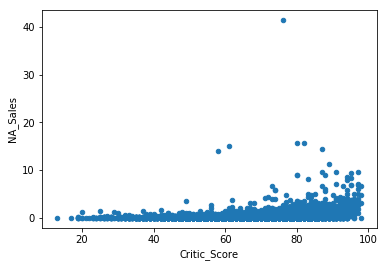

In [19]:
vg.plot(kind='scatter',x='Critic_Score',y='NA_Sales')

Os valores muito altos (como o Wii Sports com 80 milhões de cópias), estão dificultando a visualização. Para resolver este problema, podemos ou eliminar estes valores do plot ou plotar em escala logaritmica:

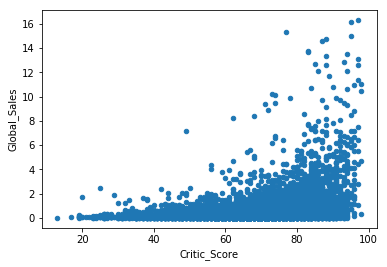

In [20]:
vg[vg.Global_Sales<20].plot(kind='scatter',x='Critic_Score',y='Global_Sales')

#vg.plot(kind='scatter',x='Critic_Score',y='Global_Sales',logy=True)

### Outras correlações mais sofisticadas ###

Como será a comparação entre as notas dos críticos para RPGs em comparação com jogos de corrida?

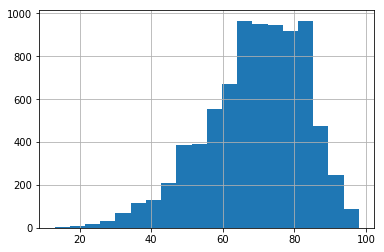

In [24]:
# Primeiro veremos o histograma global
vg.Critic_Score.hist(bins = 20)
plt.show()

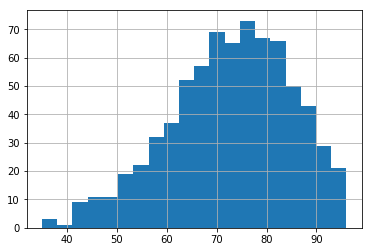

In [25]:
#Agora apenas dos RPGs
vg[vg.Genre=='Role-Playing'].Critic_Score.hist(bins = 20)
plt.show()

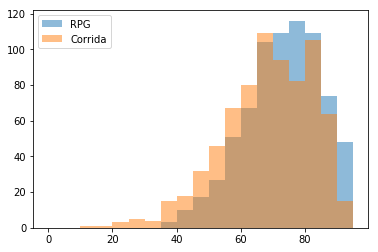

In [27]:
# Podemos comparar os RPGs com os jogos de corrida

bins = list(range(0,100,5))
vgval = vg[vg.Critic_Score.notnull()] # Remover os jogos sem valor de Critic_Score

plt.hist(vgval[vgval.Genre=='Role-Playing'].Critic_Score,bins,alpha=0.5,label='RPG')
plt.hist(vgval[vgval.Genre=='Racing'].Critic_Score,bins,alpha=0.5,label='Corrida')
plt.legend()
plt.show()

E se eu quiser comparar variáveis categóricas?

Vamos analisar duas: Gênero e Plataforma.

In [28]:
pd.crosstab(vg.Platform,vg.Genre,margins = True)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,All
Platform,,,,,,,,,,,,,
2600,61,2,2,5,9,11,6,0,24,1,12,0,133
3DO,0,1,0,0,0,1,0,0,0,1,0,0,3
3DS,188,38,14,54,28,20,11,88,7,31,26,15,520
DC,3,11,12,0,2,0,6,4,3,1,10,0,52
DS,340,238,36,391,91,236,67,200,42,284,148,79,2152
GB,6,5,0,8,19,15,2,21,1,5,9,7,98
GBA,167,38,23,110,142,41,64,73,40,18,88,18,822
GC,101,20,42,36,73,13,63,27,48,12,110,11,556
GEN,3,2,5,1,7,0,1,3,1,0,3,1,27


E se a gente quisesse esses valores em porcentagens? Podemos então aplicar uma __função lambda__ nos dados:

In [29]:
pd.crosstab(vg.Platform,vg.Genre,margins = True).apply(lambda v:100*v/v[-1],axis = 1)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,All
Platform,,,,,,,,,,,,,
2600,45.864662,1.503759,1.503759,3.759398,6.766917,8.270677,4.511278,0.000000,18.045113,0.751880,9.022556,0.000000,100.0
3DO,0.000000,33.333333,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,100.0
3DS,36.153846,7.307692,2.692308,10.384615,5.384615,3.846154,2.115385,16.923077,1.346154,5.961538,5.000000,2.884615,100.0
DC,5.769231,21.153846,23.076923,0.000000,3.846154,0.000000,11.538462,7.692308,5.769231,1.923077,19.230769,0.000000,100.0
DS,15.799257,11.059480,1.672862,18.169145,4.228625,10.966543,3.113383,9.293680,1.951673,13.197026,6.877323,3.671004,100.0
GB,6.122449,5.102041,0.000000,8.163265,19.387755,15.306122,2.040816,21.428571,1.020408,5.102041,9.183673,7.142857,100.0
GBA,20.316302,4.622871,2.798054,13.381995,17.274939,4.987835,7.785888,8.880779,4.866180,2.189781,10.705596,2.189781,100.0
GC,18.165468,3.597122,7.553957,6.474820,13.129496,2.338129,11.330935,4.856115,8.633094,2.158273,19.784173,1.978417,100.0
GEN,11.111111,7.407407,18.518519,3.703704,25.925926,0.000000,3.703704,11.111111,3.703704,0.000000,11.111111,3.703704,100.0


E se eu quiser uma tabela dessas, mas apenas contendo os jogos que venderam mais de 10 milhões de unidades?

In [30]:
pd.crosstab(vg[vg.Global_Sales>10].Platform,vg[vg.Global_Sales>10].Genre,margins = True).apply(lambda v:100*v/v[-1],axis = 1)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,All
Platform,,,,,,,,,,,,
3DS,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,25.000000,50.000000,0.000000,0.000000,0.000000,100.0
DS,10.000000,0.000000,0.000000,10.000000,20.000000,10.000000,10.000000,20.000000,0.000000,20.000000,0.000000,100.0
GB,0.000000,16.666667,0.000000,0.000000,16.666667,16.666667,0.000000,50.000000,0.000000,0.000000,0.000000,100.0
GBA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,100.0
N64,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0
NES,0.000000,0.000000,0.000000,0.000000,66.666667,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,100.0
PS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,100.0
PS2,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,100.0
PS3,28.571429,0.000000,0.000000,0.000000,0.000000,0.000000,14.285714,0.000000,57.142857,0.000000,0.000000,100.0


## Tabelas Pivo ##

Muitas vezes, queremos cruzar dados de formas mais complexas. A tabela pivo ajuda muito nisso.


Exemplo: Quem teve os melhores RPGs e adventures de acordo com a crítica? O primeiro ou o segundo Playstation?

In [31]:
rpgs = vg[(vg.Platform.isin(['PS2','PS']))& vg.Genre.isin(['Role-Playing','Adventure']) ]
rpgs.head()
pivot = rpgs.pivot_table(values=['Critic_Score'],index = ['Platform','Genre'],aggfunc = [np.mean,])
pivot

mean
                      Critic_Score
Platform Genre                    
PS       Adventure       58.000000
         Role-Playing    79.428571
PS2      Adventure       62.348837
         Role-Playing    71.639344

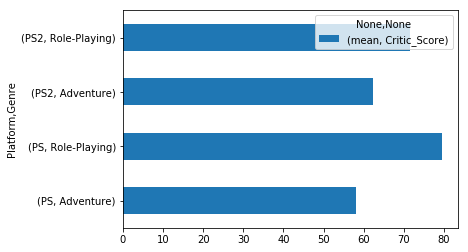

In [33]:
pivot.plot(kind='barh')
plt.show()

Exercício:

Faça uma tabela contendo a media das notas de usuários dos jogos das Publishers Capcom e Activision de acordo com o Rating

In [42]:
vg.sample(1000)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
8598,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16,NaN,NaN,NaN,NaN,NaN,NaN
14004,Worms: Ultimate Mayhem,PC,2011.0,Strategy,Unknown,0.00,0.03,0.00,0.00,0.04,66.0,4.0,7.8,48.0,Team 17,E10+
6050,SimCity 4,PC,2003.0,Simulation,Electronic Arts,0.01,0.24,0.00,0.03,0.29,84.0,36.0,8.7,268.0,Maxis,E
4369,Mario Golf: Advance Tour,GBA,2004.0,Sports,Nintendo,0.32,0.12,0.00,0.01,0.45,84.0,38.0,8.6,14.0,Camelot Software Planning,E
10240,NHL Rivals 2004,XB,2003.0,Sports,Microsoft Game Studios,0.08,0.02,0.00,0.00,0.11,65.0,39.0,8.8,20.0,Microsoft Game Studios,E
3673,Barbie Horse Adventures: Riding Camp,DS,2008.0,Sports,Activision,0.50,0.00,0.00,0.04,0.55,NaN,NaN,NaN,NaN,Activision,E
14627,Harley-Davidson: Road Trip,Wii,2010.0,Racing,Destineer,0.03,0.00,0.00,0.00,0.03,NaN,NaN,NaN,NaN,Destineer,E
2537,Patapon,PSP,2007.0,Misc,Sony Computer Entertainment,0.33,0.25,0.07,0.16,0.81,86.0,60.0,8.7,102.0,SCE Japan Studio,E
13222,Payday 2,PC,2013.0,Shooter,505 Games,0.04,0.00,0.00,0.01,0.05,79.0,51.0,3.4,3558.0,Overkill Software,M
13051,Shifters,PS2,2002.0,Adventure,3DO,0.03,0.02,0.00,0.01,0.05,37.0,12.0,5.9,8.0,3DO,T


In [43]:
rpgs = vg[[(vg.Publisher.isin(['Activision','Capcom']))] & (vg.Rating.notnull())]
#rpgs.head()

#pivot = rpgs.pivot_table(values=['User_Score'],index = ['Publisher','Rating'],aggfunc = [np.mean,])
#pivot.head()

ValueError: setting an array element with a sequence.

E se eu quiser saber quantas unidades o jogo mais vendido de cada plataforma vendeu?

In [44]:
vg.groupby(['Platform'])['Critic_Score'].mean().sort_values(ascending=False)

Platform
DC      87.357143
PC      75.928671
XOne    73.325444
PS4     72.091270
PS      71.515000
PSV     70.791667
WiiU    70.733333
PS3     70.382927
XB      69.859310
GC      69.488839
PS2     68.727273
X360    68.616812
PSP     67.424242
GBA     67.372146
3DS     67.101190
DS      63.761506
Wii     62.823932
2600          NaN
3DO           NaN
GB            NaN
GEN           NaN
GG            NaN
N64           NaN
NES           NaN
NG            NaN
PCFX          NaN
SAT           NaN
SCD           NaN
SNES          NaN
TG16          NaN
WS            NaN
Name: Critic_Score, dtype: float64

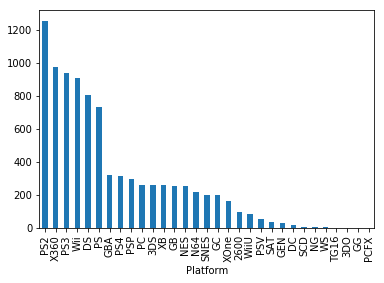

In [46]:
vg.groupby(['Platform'])['Global_Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.show()

## Agrupando ##

Você pode usar o comando groupby para gerar novas bases de dados modificadas. Por exemplo, você pode tentar prever as vendas totais de plataformas ao invés de jogos individuais. Contudo, para você utilizar os dados agrupados, você deve usar uma função de agregação (sum,count, min,max, mean, etc).

### Exemplo ###

Criando um agrupamento por plataforma

In [47]:
vgplat = vg.groupby(['Platform'])
vgplat.Global_Sales.sum()

Platform
2600      97.08
3DO        0.10
3DS      259.09
DC        15.97
DS       807.10
GB       255.45
GBA      318.50
GC       199.36
GEN       30.78
GG         0.04
N64      218.88
NES      251.07
NG         1.44
PC       260.30
PCFX       0.03
PS       730.68
PS2     1255.64
PS3      939.43
PS4      314.23
PSP      294.30
PSV       54.12
SAT       33.59
SCD        1.87
SNES     200.05
TG16       0.16
WS         1.42
Wii      908.13
WiiU      82.16
X360     971.63
XB       258.26
XOne     159.44
Name: Global_Sales, dtype: float64

Fazendo uma regressão para descobrir total de vendas de um console pelo total de jogos lançados para ele:

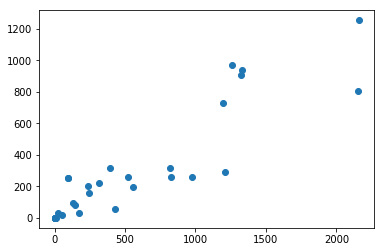

In [48]:
x = vgplat.Name.count()
y = vgplat.Global_Sales.sum()
plt.scatter(x,y)

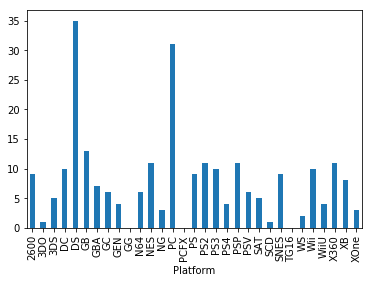

In [49]:
#Total de anos que um console teve jogos

anos = vgplat.Year_of_Release.max() - vgplat.Year_of_Release.min()
anos.plot(kind='bar')

Vocês poderiam usar a informação de ano para ponderar alguma outra informação usada na regressão por exemplo. Contudo, tem algo estranho né? O Nintendo DS está com 35 anos de jogos lançados. Vocês conseguem descobrir o porquê?